In [ ]:
# Neural Network from Scratch for A, B, C Classification
import numpy as np
import matplotlib.pyplot as plt


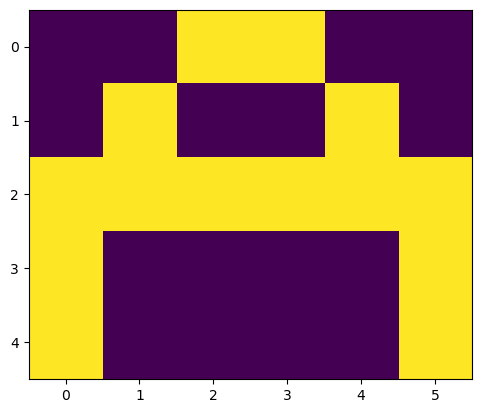

In [4]:
# Binary patterns for A, B, and C (5x6 grid)

a = np.array([
    0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1
])

b = np.array([
    1, 1, 1, 1, 0, 0,
    1, 0, 0, 0, 1, 0,
    1, 1, 1, 1, 0, 0,
    1, 0, 0, 0, 1, 0,
    1, 1, 1, 1, 0, 0
])

c = np.array([
    0, 1, 1, 1, 1, 0,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 1,
    0, 1, 1, 1, 1, 0
])

#Creating Lables
y = [[1,0,0],[0,1,0],[0,0,1]]

#Visualize the data
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [28]:
#Conver the data lables into numpy array

X = [np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
X = np.array(X)
y = np.array(y)
print(X,"\n\t",y)

[[[0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1]]

 [[1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0]]

 [[0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0]]] 
	 [[1 0 0]
 [0 1 0]
 [0 0 1]]


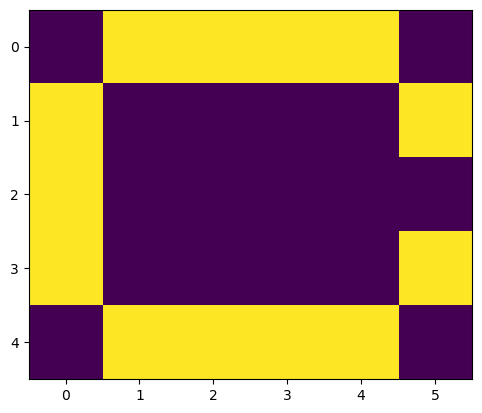

[[ 3.75676584e-03  9.71429786e-03 -8.57774939e-03 -2.18479768e-02
  -6.56949832e-03]
 [-3.44568449e-03  7.35170747e-03 -1.12965618e-02  2.96927311e-03
   8.91162535e-03]
 [ 3.86135967e-03 -9.40812389e-03  1.59879686e-02 -1.00637234e-02
  -7.02131025e-03]
 [-2.49918765e-03  5.01565620e-03  9.94901235e-05  9.71128582e-04
  -2.25438745e-03]
 [ 1.48139669e-03 -2.40666316e-03 -5.38001963e-05 -2.60513930e-02
  -8.33939026e-03]
 [ 2.25026521e-02 -9.36630686e-03 -9.20368278e-03  7.68832050e-03
   4.98167388e-03]
 [ 3.95578358e-03 -1.79309432e-02  6.18113739e-03  9.44077113e-03
   1.07489602e-02]
 [-6.37073937e-03  5.27046628e-03 -7.54016779e-03  1.59473971e-02
  -2.33381944e-02]
 [-1.14493775e-03  1.99208991e-04 -1.34053208e-02 -2.57099764e-03
  -7.79809548e-03]
 [-1.12939108e-02  9.22224277e-03 -5.07999747e-03  7.92702378e-03
  -1.65890913e-02]
 [-3.48718160e-03 -4.22101214e-03 -2.16996221e-02 -4.78868454e-03
   3.90707779e-03]
 [ 1.05008430e-02  4.14060091e-03  9.63752429e-03 -1.04937893e-02

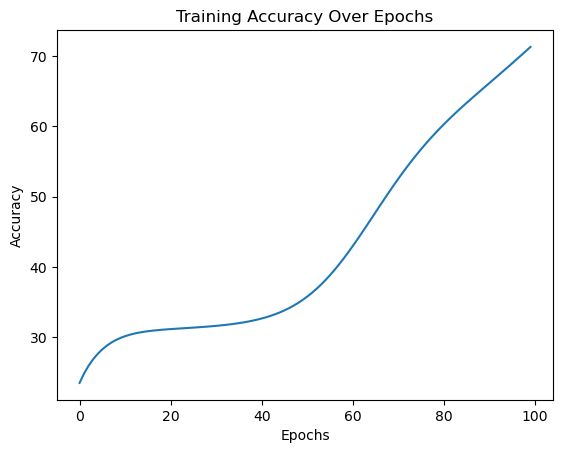

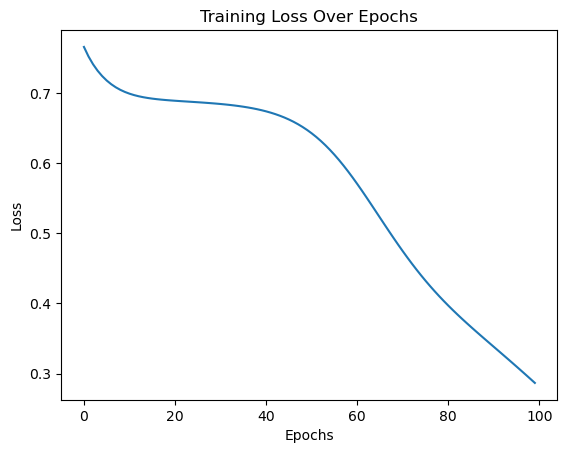

[[ 2.58367742e-01 -2.40765981e-01 -9.79825013e-02 -5.33792941e-02
   8.32352098e-02]
 [ 1.56137988e-01 -4.06980593e-01  2.41115448e-01 -3.56079499e-01
   2.95665322e-01]
 [-3.37694225e-02 -4.55807678e-02 -1.78947065e-02 -1.37540406e-02
   1.16435542e-02]
 [-4.01299698e-02 -3.11569877e-02 -3.37831850e-02 -2.71918859e-03
   1.64104770e-02]
 [-9.35459066e-02 -1.66258685e-01  3.41762961e-01 -3.53568848e-01
   1.88609598e-01]
 [ 2.25026521e-02 -9.36630686e-03 -9.20368278e-03  7.68832050e-03
   4.98167388e-03]
 [ 1.63539457e-01 -4.32263244e-01  2.58593147e-01 -3.49608001e-01
   2.97502656e-01]
 [-2.03585195e-01  3.83430123e-01 -2.93834852e-01  3.71305852e-01
  -2.91427026e-01]
 [-1.14493775e-03  1.99208991e-04 -1.34053208e-02 -2.57099764e-03
  -7.79809548e-03]
 [-1.12939108e-02  9.22224277e-03 -5.07999747e-03  7.92702378e-03
  -1.65890913e-02]
 [ 5.39093396e-02  1.23458365e-01 -3.97399059e-01  3.19038453e-01
  -1.74377046e-01]
 [-8.45264603e-02 -1.59711421e-01  3.51454286e-01 -3.38011244e-01

In [53]:
#input (1,30)
#hidden(1,5)
#output(3,3)

#activation function

def sigmoid (X):
    return (1/(1+np.exp(-X)))


#creating feed forward Neural network

def f_forward (X,w1,w2):
    #hidden layer
    z1=X.dot(w1)       #input from the layer 1
    a1=sigmoid(z1)     # output of the layer
    #output layer

    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)


#initialize the weights

def generate_wt (x,y):
    l=[]
    for i in range(x*y):
        l.append(np.random.randn())
    return (np.array(l).reshape(x,y))


def compute_loss(out, Y):
    s = (np.square(out - Y))
    s = np.sum(s) / len(Y)
    return s




#back propogation

def back_prop(X,y,w1,w2,alpha):
    #hidden
    z1 = X.dot(w1)
    a1 = sigmoid(z1)
    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    d2=(a2-y)
    d1 = np.multiply(d2.dot(w2.T), a1 * (1 - a1))

    w1_adj = X.reshape(-1,1).dot(d1.reshape(1,-1))
    w2_adj = a1.reshape(-1,1).dot(d2.reshape(1,-1))

    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
    return(w1,w2)




def train(X, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    loss_list = []
    for j in range(epoch):
        epoch_losses = []
        for i in range(len(X)):
            out = f_forward(X[i], w1, w2)
            epoch_losses.append(compute_loss(out, Y[i].reshape(1, -1)))
            w1, w2 = back_prop(X[i], Y[i].reshape(1, -1), w1, w2, alpha)
        avg_loss = sum(epoch_losses) / len(X)
        epoch_acc = (1 - avg_loss) * 100
        print("Epoch:", j + 1, "Accuracy:", epoch_acc)
        acc.append(epoch_acc)
        loss_list.append(avg_loss)
    return acc, loss_list, w1, w2





def predict (X,w1,w2):
    out = f_forward(X,w1,w2)
    maxm = 0
    k = np.argmax(out[0])
    if (k == 0):
         print("Image is of leter A")
           
    elif (k == 1):
         print("Image is of leter B")
    else:
         print("Image is of leter C")

plt.imshow(X[2].reshape(5,6))
plt.show()



def generate_wt(input_dim, output_dim):
    return np.random.randn(input_dim, output_dim) * 0.01

w1 =  generate_wt (30,5)
w2 = generate_wt (5,3)

print(w1,"\n",w2)

acc,loss,w1,w2 = train (X,y,w1,w2,0.1,100)

import matplotlib.pyplot as plt1

import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.title("Training Accuracy Over Epochs")
plt.show()

# Plotting loss
plt.plot(loss)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Training Loss Over Epochs")
plt.show()


print(w1,"\n",w2)

predict (X[2].reshape(1,-1),w1,w2)



